<div align="center">
  <h2>Analysis of Vodafone users' fluxes</h2>
</div>


<div align="left">

| Group | Name Surname | Student Number |
|-------|--------------|----------------|
| 19    | Emre Davut   | 2041382        |

</div>

### Libraries

In [110]:
import numpy as np 
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

## ASSIGNMENTS

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

    1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked   plot of the first 20 countries with the most visitors
    
    1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.
    
    
    
    
2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

    2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only

    2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.

### 1. Data Preparation

Reading the data:

In [111]:
def read_csv(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']
    return pd.read_csv(file_path, encoding=encoding)

day_od = read_csv('day_od.csv')
distinct_users_day = read_csv('distinct_users_day.csv')
codici_istat_comune = read_csv('codici_istat_comune.csv')
codici_istat_provincia = read_csv('codici_istat_provincia.csv')
codici_nazioni = read_csv('codici_nazioni.csv')

population = read_csv('DCIS_POPRES1_30082023201635739.csv')

C:\Users\Emre\AppData\Local\Temp\ipykernel_18916\2879848301.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, encoding=encoding)


Creating dataframes from the data:

In [112]:
data_distinct = pd.DataFrame(distinct_users_day)
country_code = pd.DataFrame(codici_nazioni)
province_code = pd.DataFrame(codici_istat_provincia)
day = pd.DataFrame(day_od)
population = pd.DataFrame(population)

### 1.1

Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors

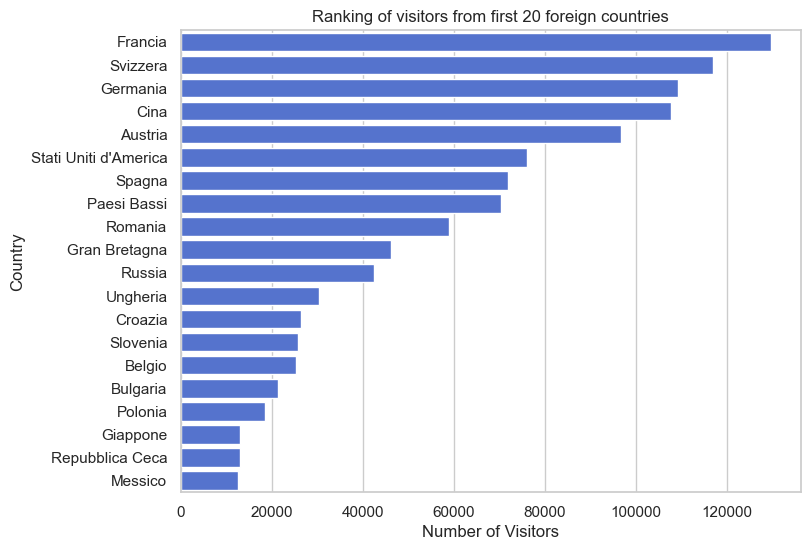

In [113]:
# Merging data and filtering foreign visitors
country = data_distinct.merge(country_code[['COD_COUNTRY', 'COUNTRY_NAME_IT']])
foreigner = country[country['CUST_CLASS'] == 'foreigner'].reset_index(drop=True)

# Groupping by country and sum visitors
df_foreigner = foreigner.groupby('COUNTRY_NAME_IT')['VISITORS'].sum()
data = df_foreigner.reset_index()

# Sorting and selecting the top 20 countries
data.sort_values(by='VISITORS', ascending=False, inplace=True)
highest_countries = data.nlargest(20, 'VISITORS')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='VISITORS', y='COUNTRY_NAME_IT', data=highest_countries, color='royalblue')
plt.title('Ranking of visitors from first 20 foreign countries')
plt.xlabel('Number of Visitors')
plt.ylabel('Country')
plt.show()

### 1.2

Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.

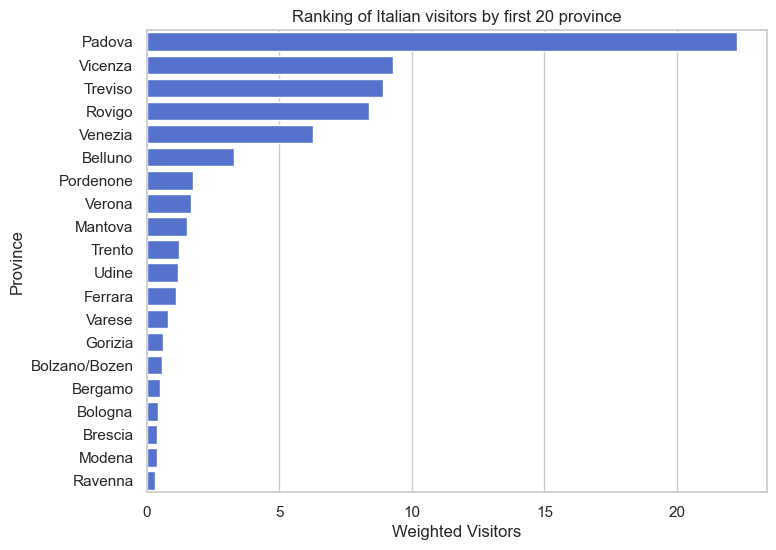

In [114]:
# Analyzing Italian visitors by province weighted by population
province = data_distinct.merge(province_code[['COD_PRO', 'PROVINCIA']])
visitors = province_data[province_data['CUST_CLASS'] == 'visitor'].reset_index(drop=True)
visitor_sum = visitors.groupby('PROVINCIA', as_index=False)['VISITORS'].sum()

population_top = population.loc[(population['Stato civile'] == 'totale') & (population['Sesso'] == 'totale')]
population_top = population_top[['Territorio', 'Value']].reset_index(drop=True)
population_top = population_top.groupby('Territorio')['Value'].sum()

merged_df = pd.merge(population_top, visitor_sum, left_on='Territorio', right_on='PROVINCIA')
merged_df['Weighted Sum'] = merged_df['VISITORS'] / merged_df['Value']
merged_df.sort_values(by='Weighted Sum', ascending=False, inplace=True)
weighted_highest = merged_df.nlargest(20, 'Weighted Sum')

# Create a plot for weighted Italian visitors by inhabitants
plt.figure(figsize=(8, 6))
sns.barplot(x='Weighted Sum', y='PROVINCIA', data=weighted_highest, color='royalblue')
plt.title('Ranking of Italian visitors by first 20 province')
plt.xlabel('Weighted Visitors')
plt.ylabel('Province')
plt.show()

### 2. Study of the visitors' fluxes

You are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways:

1. from south, A13 towards Bologna-Roma; 

2. from west, A4 towards Milano-Torino; 

3. from north-east, A4 towards Venice-Trieste 

Evaluate which of the three directions has to be prioritized.

In [115]:
a13 = ['Bologna', 'Ferrara', 'Rovigo']
a4_west = ['Brescia', 'Vicenza', 'Verona']
a4_northeast = ['Venezia', 'Treviso', 'Trieste']

day_merged = day.merge(province_code[['COD_PRO','PROVINCIA']])

a13_highway = day_merged.loc[day_merged['PROVINCIA'].isin(a13)]
a4_west_highway = day_merged.loc[day_merged['PROVINCIA'].isin(a4_west)]
a4_northeast_highway = day_merged.loc[day_merged['PROVINCIA'].isin(a4_northeast)]

### 2.1

Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only

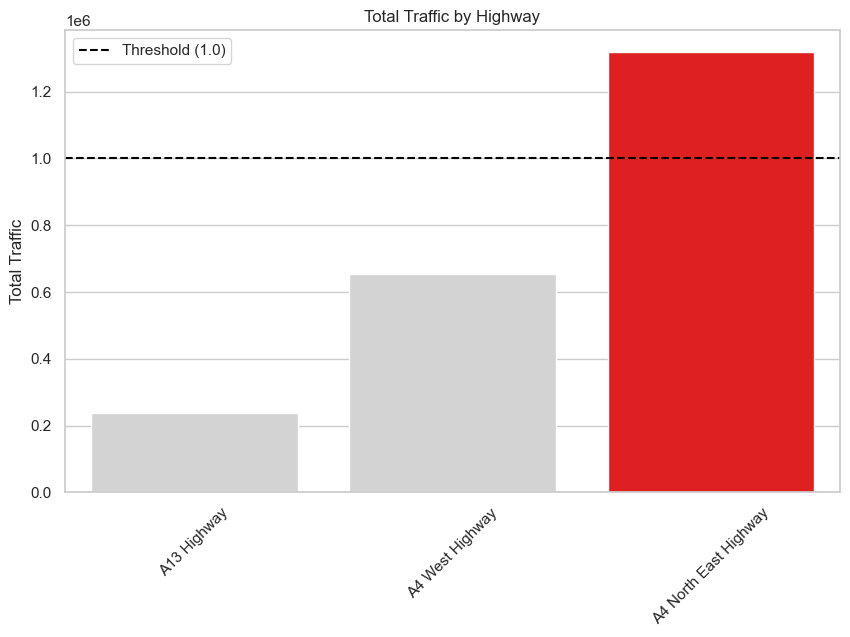

In [116]:
a13_highway_all = a13_highway['FLOW'].sum()
a4_west_highway_all = a4_west_highway['FLOW'].sum()
a4_northeast_highway_all = a4_northeast_highway['FLOW'].sum()

data = {
    'Highway': ['A13 Highway', 'A4 West Highway', 'A4 North East Highway'],
    'Total Voice Data Flow': [a13_highway_all, a4_west_highway_all, a4_northeast_highway_all]
}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Highway', y='Total Voice Data Flow', data=data, palette=['lightgrey', 'lightgrey', 'red'])

ax.axhline(y=1e6, color='black', linestyle='--', label='Threshold (1.0)')
plt.legend()

plt.title('Total Traffic by Highway')
plt.ylabel('Total Traffic')
plt.xticks(rotation=45)
plt.show()

### 2.2

Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.

In [117]:
weekend, weekdays = ['Sabato', 'Domenica'], ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì']

# Data traffic for each highway
weekday_a13 = a13_highway.groupby('DOW')['FLOW'].sum().reset_index()
weekday_a4_west = a4_west_highway.groupby('DOW')['FLOW'].sum().reset_index()
weekday_a4_northeast = a4_northeast_highway.groupby('DOW')['FLOW'].sum().reset_index()

# Each highway's data traffic separated into weekend and working days
workday_a13 = weekday_a13.loc[weekday_a13['DOW'].isin(weekdays)]
weekend_a13 = weekday_a13.loc[weekday_a13['DOW'].isin(weekend)]
workday_a4_west = weekday_a4_west.loc[weekday_a4_west['DOW'].isin(weekdays)]
weekend_a4_west = weekday_a4_west.loc[weekday_a4_west['DOW'].isin(weekend)]
workday_a4_northeast = weekday_a4_northeast.loc[weekday_a4_northeast['DOW'].isin(weekdays)]
weekend_a4_northeast = weekday_a4_northeast.loc[weekday_a4_northeast['DOW'].isin(weekend)]

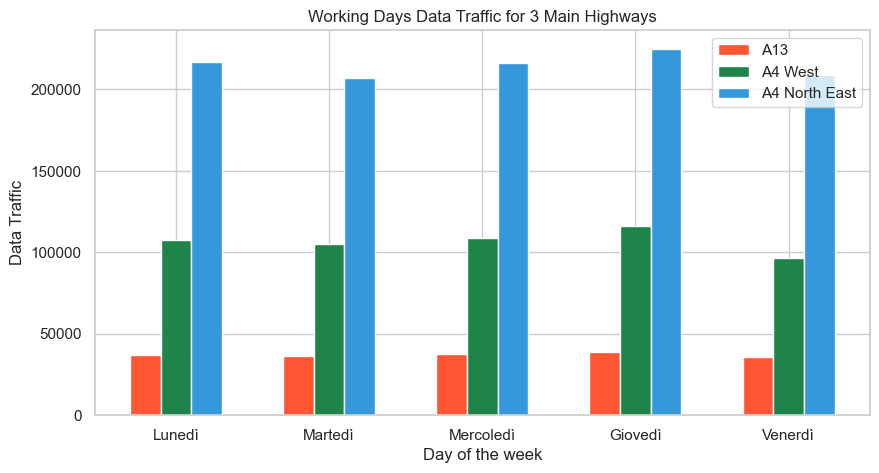

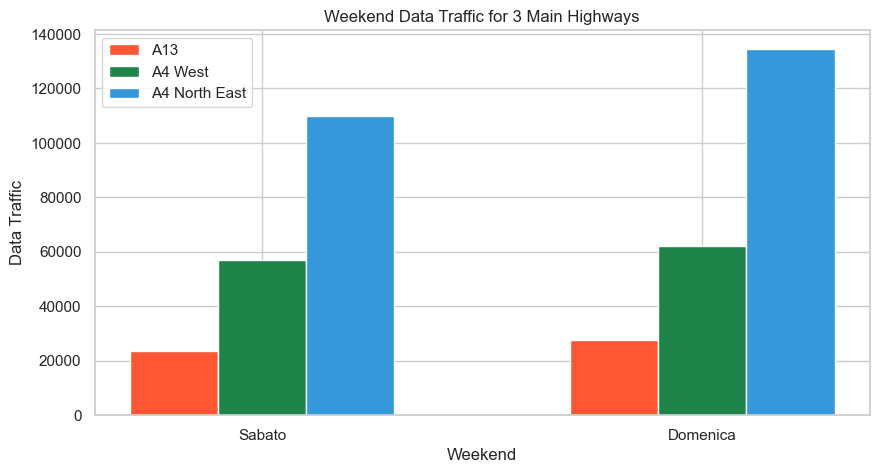

In [118]:
# Plot for working days
x = np.arange(len(weekdays))
width= 0.2
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x - width, workday_a13['FLOW'], width, label='A13', color='#FF5733')
ax1.bar(x , workday_a4_west['FLOW'], width, label='A4 West', color='#1E8449')
ax1.bar(x + width, workday_a4_northeast['FLOW'], width, label='A4 North East', color='#3498DB')
ax1.set_title('Working Days Data Traffic for 3 Main Highways')
ax1.set_xlabel('Day of the week')
ax1.set_ylabel('Data Traffic')
ax1.set_xticks(x, weekdays)
ax1.legend()
plt.show()

# Plot for weekend days
w = np.arange(len(weekend))
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(w - width,weekend_a13['FLOW'],width, label='A13', color='#FF5733')
ax1.bar(w ,weekend_a4_west['FLOW'],width, label='A4 West', color='#1E8449')
ax1.bar(w + width,weekend_a4_northeast['FLOW'],width, label='A4 North East', color='#3498DB')
ax1.set_title('Weekend Data Traffic for 3 Main Highways')
ax1.set_xlabel('Weekend')
ax1.set_ylabel('Data Traffic')
ax1.set_xticks(w, weekend)
ax1.legend()
plt.show()

## Traffic Analysis Summary

Upon examining the overall traffic flow, it's clear that there's an issue with **data traffic exceeding** its designated **limit**, particularly along the **A4 highway's north-east route toward Venice-Trieste**. 

To tackle this challenge, it's necessary to **set up additional base stations** along this busy stretch. The high total traffic, which has crossed the threshold, emphasizes the need for these new base stations. We're proposing to strategically place **two new stations—one at the Padova entry point** and another between **Venice and Treviso** to manage this surge in demand effectively.

When we delve into daily traffic patterns, taking into account both workdays and weekends, we find a **consistent** and **predictable rhythm**. There's no sudden disruption during peak hours or on different days, indicating a **stable network performance**. This reassuring pattern means we can confidently introduce the new base stations to enhance the network's capabilities and handle increasing demands without encountering unexpected spikes.

                            1- New Standalone Base Stations: Expensive but most convenient solution
<img src="https://cdn.techhq.com/wp-content/uploads/2019/09/shutterstock_1445231699-861x484.jpg" alt="Base" width="400">

                            2- Mobile Base Stations: Temporary but cheaper solution, needs maintenance
<img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Mobile_Phones_Base_Station_Cars_of_Taiwan_Mobile_and_Far_Eastone_Right_Side_View_at_Chengkungling_Ground_20131012.JPG" alt="Base Station" width="400">

